In [ ]:
%pip install latex
%pip install dustmaps
%pip install msttcorefonts -qq
%pip install texlive-latex-extra texlive-fonts-recommended dvipng cm-super
%pip install matplotlib numpy astropy pandas

# Import Dependencies

In [ ]:
import dustmaps
import warnings
import numpy as np
import pandas as pd
from astropy import units as u
import matplotlib.pyplot as plt
from dustmaps.sfd import SFDQuery
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM
#
#
dustmaps.sfd.fetch()
warnings.filterwarnings('ignore')
#
#
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": 'Times New Roman'
# })
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
#
#
%matplotlib inline

# Method Definitions

In [23]:
def dist(z=None):
  cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
  d = cosmo.luminosity_distance(z)
  return d

def abs_mag(m, d):
  M = m - (5*np.log10(d.to(u.Mpc).value * 1e+6)) + 5
  return M

def abs_mag_ext_corr(m, d, mbv):
  ar = 2.271 * mbv
  M = m - (5*np.log10(d.to(u.Mpc).value * 1e+6)) + 5 - ar
  return M

def get_extinction(ra, dec):
  c = SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')
  sfd = SFDQuery()
  mbv = round(sfd(c), 2)
  return mbv

def flux_error(mag, err_mag):
    err_down = 10**(-0.4*(mag - err_mag)) - 10**(-0.4*mag)
    err_up = 10**(-0.4*mag) - 10**(-0.4*(mag + err_mag))
    err_flux = 0.5*(err_down + err_up)
    return err_flux

def mag_error(flux, err_flux):
    err_down = abs(-2.5*np.log10(flux + err_flux) + 2.5*np.log10(flux))
    err_up = abs(-2.5*np.log10(flux) + 2.5*np.log10(flux - err_flux))
    err_down = np.where(np.isnan(err_down), 1e4, err_down)
    err_up = np.where(np.isnan(err_up), 1e4, err_up)
    err_mag = 0.5*(err_down + err_up)
    return err_mag

def redshift_error(z, err_z):
    err_mag = 0.5*(err_z/(z*np.log(10)))
    return err_mag

## Find absolute mag. (M) by providing z_sp/z_ph and apparent mag. (m) of the ZTF object

In [32]:
#
# z = ...
# m = ...
#
# M = abs_mag(m, dist(z))
# print(f'Absolute magnitude: {M:.2f}')
#
# Get extinction values
#
# ra = ...
# dec = ...
#
# mbv = get_extinction(ra, dec)
# print(f"Extinction: {mbv}")

# Meta data for the ZTF OIDs in the SLSNE Search with PineForest Paper


1.   AT 2019tjf(569204400026517) - PSN (TNS) - Discovery Mag. @ TNS - [19.502, 20.15 (non-ZTF)] [19.10 (SNAD rZTF)]- Coord. - [135.74808636, +15.4811796947] - z_ph = [0.207 +- 0.092]
2.   AT 2019sez(518203200005199) - PSN (TNS) - Discovery Mag. @ TNS - [19.44 (r-ZTF)][18.96 (SNAD r-ZTF)] - Coord. - [134.15162349, +9.06560061301] - z_ph = [0.114 +- 0.063]
3.  SN 2018dfa(794208200041246) - SN IIP (TNS) - Discovery Mag. @ TNS - [19.346 (non-ZTF)][19.0 (SNAD r-ZTF)] - Coord. - [230.217170713, +54.2155436068] - r&g ZTF band - z_ph = [0.212 +- 0.054] - z_sp = [0.125]
4. AT 2019nkc(721207400007544) - PSN (TNS) - Discovery Mag. @ TNS - [19.73 (r-ZTF)][17.447 (SNAD r-ZTF)] - Coord. [235.191875, +38.845211] - r&g&i ZTF band - z_ph = [0.109 +- 0.064]
5. AT 2018moa(SNAD247 — 821210200003351) - PSN (TNS) - Discovery Mag. @ TNS - [19.37 (r-ZTF)][18.948 (SNAD r-ZTF)] - Coord. - [207.16852, +63.57014] - r&g&i ZTF band - z_ph = [0.429 +- 0.381]
6. AT 2018mob(SNAD248 — 821215400003803) - PSN (TNS) - Discovery Mag. @ TNS - [20.55 (r-ZTF)][19.422 (SNAD r-ZTF)] - Coord. - [205.98618, +64.6032] - r&g&i ZTF band - z_ph = [0.181 +- 0.040]
7. SN 2018fcg(689212300032140) - SLSN I (TNS) - Discovery Mag. @ TNS - [20.62 (g-ZTF)][18.409 (SNAD r-ZTF)] - Coord. - [317.40325, +33.4832] - r&g ZTF band - z_ph = []- z_sp = [0.101]


###---------------------------------------------------------------------

9. 719206400011472/ SN 2019bmj - SN II (TNS) - Coord. - [220.291684191 +39.0724038966] - Discovery Mag. @ TNS - [18.588 (orange-ATLAS)][]- z_ph = [0.07 +- 0.031] - [18.564 (SNAD r-ZTF)] - z_sp = [0.05]
10. 794208200022136/ SN 2018dfa - SN IIP (TNS) - Coord. - [230.217170713 +54.2155436068] - Discovery Mag. @ TNS - [19.346 (orange-ATLAS)][]- z_ph = [0.212 +- 0.054] - [18.494 (SNAD r-ZTF)] - z_sp = [0.125]

# Generate Plots: 

## Non-SLSNe Objects:

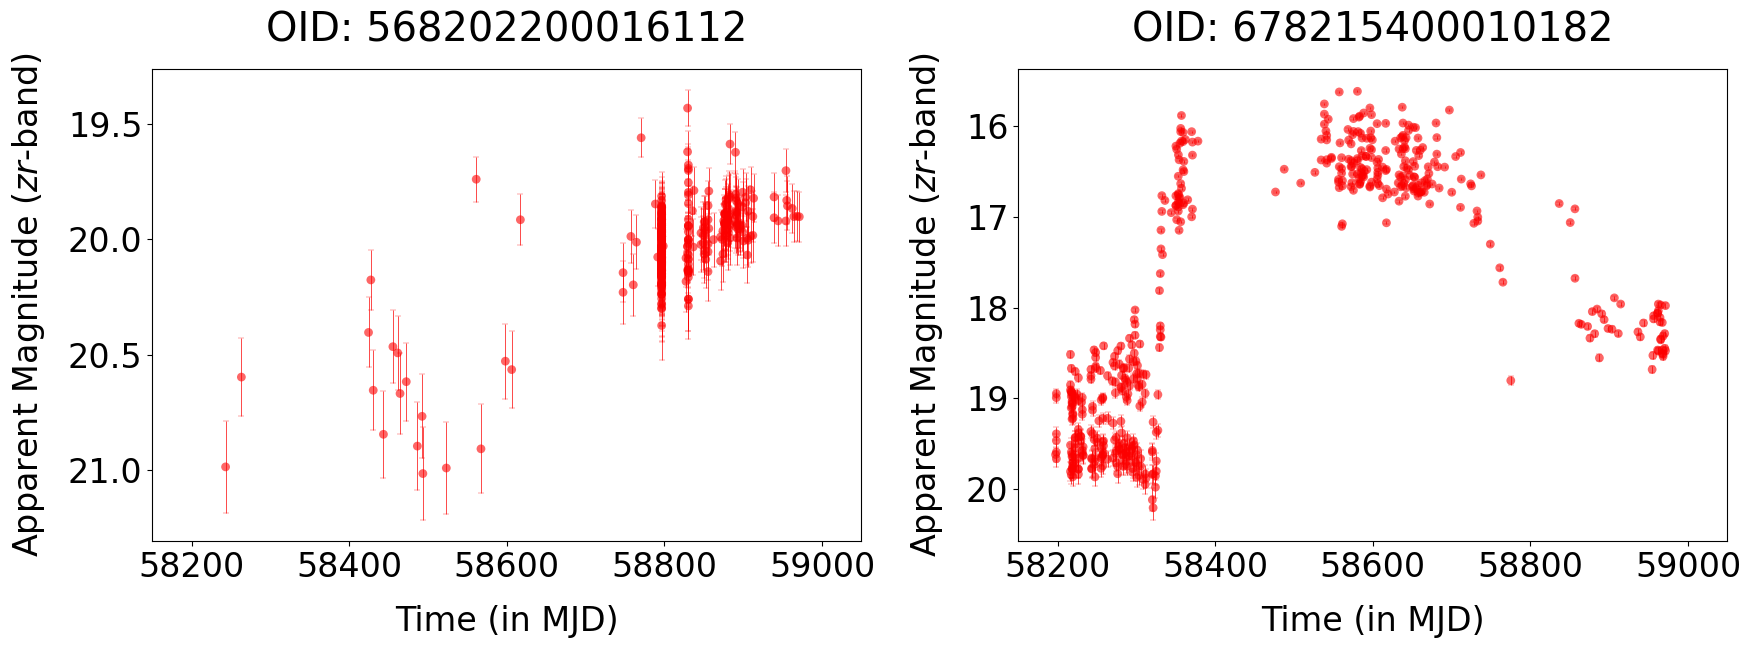

In [46]:
#
# Parameter settings
#
plt.rcParams.update({'font.size': 24})
fig = plt.figure(figsize=(18,7), constrained_layout=True)
#
# Provide ZTF OIDs for non-SLSNe objects
#
non_sne=[568202200016112, 678215400010182]
#
#
#
for i, oid in enumerate(non_sne):
  #
  #
  oid_df = pd.read_csv(f"../ztf_oids/{oid}.csv", index_col=None)
  #
  fil_oid_df = oid_df[(oid_df["mjd"]>=58194) & (oid_df["mjd"]<=58972)]
  #
  x=fil_oid_df["mjd"]
  y=fil_oid_df["mag"]
  err=fil_oid_df["magerr"]
  ax = plt.subplot(1, 2, i+1) 
  ax.invert_yaxis()
  # plt.plot(fil_oid_df["mjd"], fil_oid_df["mag"], color=data[data["oid"]==oid]["color"].values
  plt.scatter(x, y, c="#fc0000", s=40, alpha=0.6, edgecolors='none')
  plt.errorbar(x, y, c="#fc0000", yerr=err, fmt='none', elinewidth=0.5, capsize=2, capthick=0.25)
  ax.set_xlabel("Time (in MJD)", labelpad=15)
  ax.set_ylabel("Apparent Magnitude ($\mathit{zr}$-band)", labelpad=15)
  ax.set_title(f"OID: {oid}", pad=20)
  ax.set_xlim([58150, 59050])
  plt.tight_layout()
  # plt.savefig("../figures/non-SNe.png")

## Generate data for the potential SLSNe objects from PineSearch 

In [68]:
#
# Provide the ZTF OIDs for the SLSNe objects and the IAU names
#
oid_dict = {"AT 2019sez": [518203200005199],
            "SN 2018dfa":[794208200041246],
            "AT 2019nkc":[721207400007544],
            "AT 2018moa": [821210200003351],
            "AT 2018mob": [821215400003803],
            "SN 2018fcg": [689212300032140, 688209400039752],
            "SN 2019bmj":[719206400011472],
            "AT 2019tjf":[569204400026517]}
#
iau_name = ["AT 2019sez", "SN 2018dfa", "AT 2019nkc", "AT 2018moa", "AT 2018mob", "SN 2018fcg", "SN 2019bmj", "AT 2019tjf"]
#
# Get extinction values for the SLSNe
#
mbv = [0.04, 0.01, 0.02, 0.02, 0.02, 0.17, 0.01, 0.04]
#
# Get the z_ph/z_sp for the SLSNe
#
z_sp = [0.0, 0.125, 0.0, 0.0, 0.0, 0.101, 0.05, 0.0]
z_err = [0.063, 0.0, 0.064, 0.381, 0.040, 0.0, 0.0, 0.092]
z_ph = [0.114, 0.212, 0.109, 0.429, 0.181, 0.101, 0.07, 0.207]
#
# Get ref mag and err for the SLSNe
#
ref_mag = [20.747, 20.624, 20.812, 20.169, 20.191, 22.164, 20.424, 20.486]
ref_err = [0.072, 0.019, 0.052, 0.016, 0.018, 0.077, 0.054, 0.061]
#
# Define colors and max time (from GP) for the SLSNe
#
colors = ["#b007e2", "#05fbbf", "#34e0e3", "#4855f9", "#f5075a", "#fb0510", "#ab67fb", "#33ff57"]
max_time = [58747.5, 58350.4, 58751.3, 58198.4, 58245, 58358.6, 58547.1, 58655]


In [70]:
l_dist = list()
abs_mag_list = list()
data = pd.DataFrame()
data["mbv"] = mbv
data["z_ph"] = z_ph
data["z_sp"] = z_sp
data["z_err"] = z_err
data["ref"] = ref_mag
data["color"] = colors
data["ref_err"] = ref_err
data["max_time"] = max_time
data["iau_name"] = iau_name
#
# Calculate distance
#
for i in range(len(data)):
  row = data.iloc[i, :]
  if row["z_sp"] == 0.0:
    l_dist.append(dist(row["z_ph"]))
  else:
    l_dist.append(dist(row["z_sp"]))

data["dist"] = l_dist
#
data

,mbv,z_ph,z_sp,z_err,ref,color,ref_err,max_time,iau_name,dist
0,0.04,0.114,0.000,0.063,20.747,#b007e2,0.072,58747.5,AT 2019sez,529.6427103914117 Mpc
1,0.01,0.212,0.125,0.000,20.624,#05fbbf,0.019,58350.4,SN 2018dfa,584.9314851500307 Mpc
2,0.02,0.109,0.000,0.064,20.812,#34e0e3,0.052,58751.3,AT 2019nkc,504.74486754958417 Mpc
3,0.02,0.429,0.000,0.381,20.169,#4855f9,0.016,58198.4,AT 2018moa,2359.760966638052 Mpc
4,0.02,0.181,0.000,0.040,20.191,#f5075a,0.018,58245.0,AT 2018mob,877.0479724162268 Mpc
5,0.17,0.101,0.101,0.000,22.164,#fb0510,0.077,58358.6,SN 2018fcg,465.2145770578577 Mpc
6,0.01,0.070,0.050,0.000,20.424,#ab67fb,0.054,58547.1,SN 2019bmj,222.28905465961708 Mpc
7,0.04,0.207,0.000,0.092,20.486,#33ff57,0.061,58655.0,AT 2019tjf,1018.5057355037536 Mpc


In [51]:
# 
# Calculate absolute mag. with extinction correction
#
# name = "AT 2019tjf"
# m = 19.11 
# M = abs_mag_ext_corr(m, data[data["iau_name"]==name]["dist"].values[0], data[data["iau_name"]==name]["mbv"].values[0])
# M
#
# Calculate redshift error
#
# z_err = redshift_error(z, err_z)
# z_err

## Plot single ZTF OIDs: 

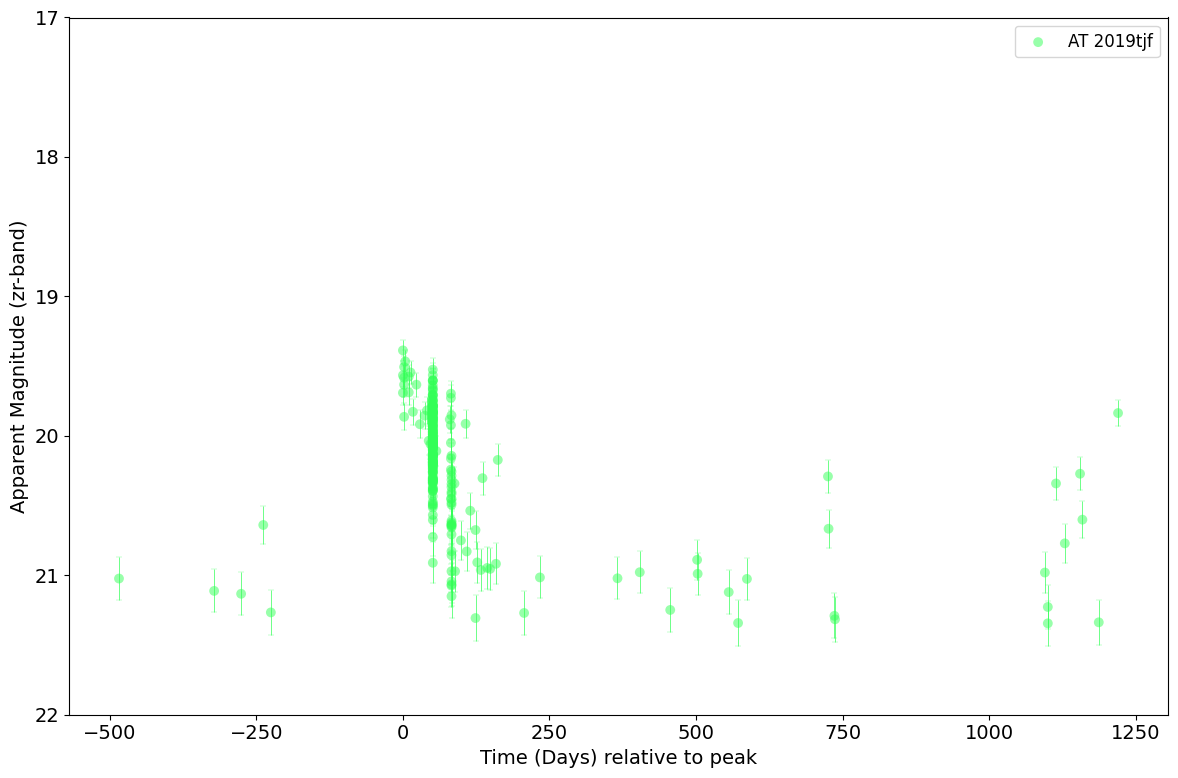

In [71]:
#
name = "AT 2019tjf"
#
fig = plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 14})
legend_list=list()
ax = plt.subplot()
ax.invert_yaxis()
ax.set_ylim([22, 17])
#
#
if data[data["iau_name"]==name]["z_sp"].values[0] == 0:
  legend_list.append(name)
  for e, oid in enumerate(oid_dict[name]):
    #
    #
    oid_df = pd.read_csv(f"../ztf_oids/{oid}.csv", index_col=None)
    r_ref = data[data["iau_name"]==name]["ref"].values[0]
    err_r_ref = data[data["iau_name"]==name]["ref_err"].values[0]
    #
    #
    oid_df['flux'] = 10**(-0.4*oid_df['mag']) - 10**(-0.4*r_ref)
    oid_df['fluxerr'] = np.sqrt(flux_error(oid_df['mag'],oid_df['magerr'])**2 + flux_error(r_ref,err_r_ref)**2)
    oid_df["snr"] = oid_df["flux"] / oid_df["fluxerr"]
    oidfil_df = oid_df[oid_df["snr"] > 2]
    # oidfil_df = oid_df.copy()
    #
    mag = - (2.5 * np.log10(oidfil_df["flux"]))
    mag_err = mag_error(oidfil_df["flux"], oidfil_df["fluxerr"])
    #
    #
    if data[data["iau_name"]==name]["z_sp"].values[0] == 0:
      z_err = redshift_error(data[data["iau_name"]==name]["z_ph"].values[0], data[data["iau_name"]==name]["z_err"].values[0])
    else:
      z_err = redshift_error(data[data["iau_name"]==name]["z_sp"].values[0], data[data["iau_name"]==name]["z_err"].values[0])
    #
    #
    oidfil_df["app_mag"] = mag
    oidfil_df["app_magerr"] = mag_err
    #
    oidfil_df = oidfil_df.dropna()
    # abs_m = abs_mag_ext_corr(oid_df["mag"], data[data["oid"]==oid]["dist"].values[0], data[data["oid"]==oid]["mbv"].values[0])
    # abs_m = abs_mag(oid_df["mag"], data[data["oid"]==oid]["dist"].values[0])
    # oid_df["abs_mag"] = abs_m
    min_mag_idx = oidfil_df['mag'].idxmin()
    min_mjd = oidfil_df['mjd'][min_mag_idx]
    oidfil_df['delta_mjd'] = oidfil_df['mjd'] - min_mjd
    # x=filter_df["delta_mjd"].to_numpy()
    # y=filter_df["mag"].to_numpy()
    x=oidfil_df["delta_mjd"].to_numpy()
    y=oidfil_df["app_mag"].to_numpy()
    #
    ax.scatter(x, y, c=data[data['iau_name']==name]["color"].values[0], s=50, alpha=0.5, edgecolors='none')
    ax.errorbar(x, y, c=data[data['iau_name']==name]["color"].values[0], yerr=oidfil_df["magerr"], fmt='none', elinewidth=0.5, capsize=2, capthick=0.2)

ax.grid(False)
ax.set_xlabel("Time (Days) relative to peak")
ax.set_ylabel("Apparent Magnitude (zr-band)")
ax.legend(legend_list, loc='best', fontsize="12")
plt.tight_layout()


## Plot potential SLSNe with spec. redshift

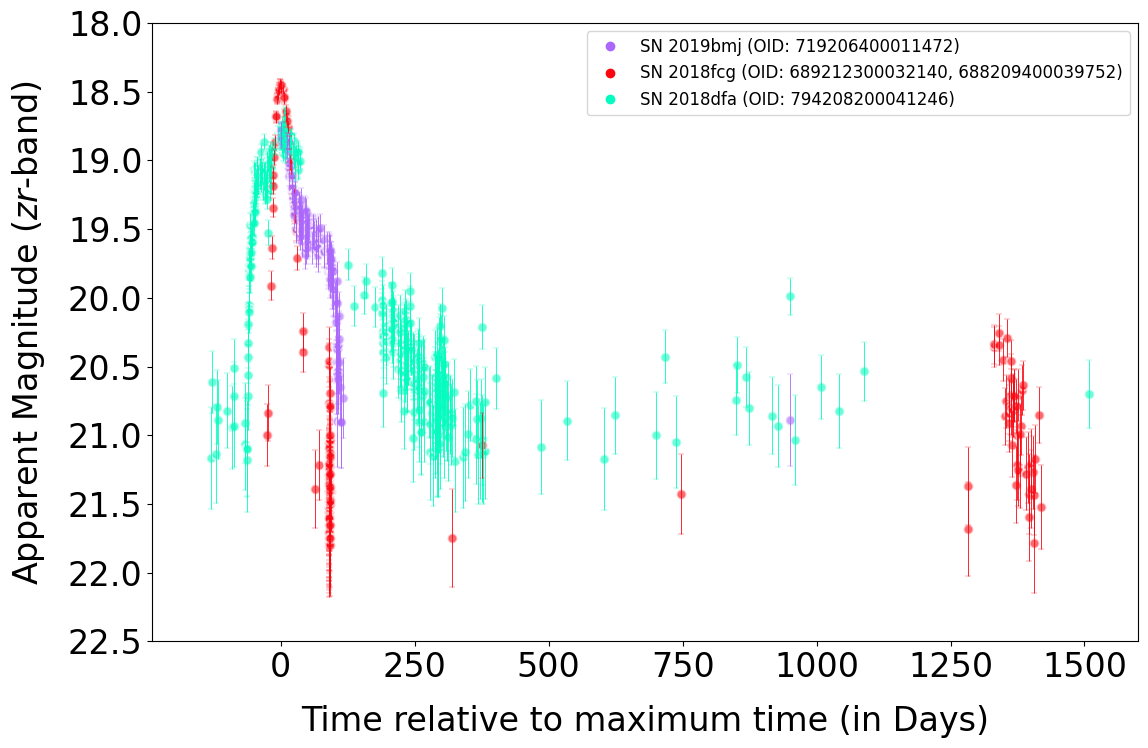

In [ ]:
sp_legend_list = [f"SN 2018dfa (OID: 794208200041246)",
                  f"SN 2018fcg (OID: 689212300032140, 688209400039752)",
                  f"SN 2019bmj (OID: 719206400011472)"]
#
fig = plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 24})
color_list=list()
marker_list=list()
ax = plt.subplot()
ax.invert_yaxis()
ax.set_xlim([-240, 1600])
ax.set_ylim([22.5, 18])
for name in oid_dict.keys():
  #
  if (data[data["iau_name"]==name]["z_sp"].values[0] != 0) and (name not in ["SN 2019meh"]):
    #
    color_list.append(data[data['iau_name']==name]["color"].values[0])
    #
    if name == "SN 2019meh":
      marker_list.append("D")
    else:
      marker_list.append("o")
    for oid in oid_dict[name]:
      # 
      oid_df = pd.read_csv(f"../ztf_oids/{oid}.csv", index_col=None)
      # 
      r_ref = data[data["iau_name"]==name]["ref"].values[0]
      err_r_ref = data[data["iau_name"]==name]["ref_err"].values[0]
      #
      oid_df['flux'] = 10**(-0.4*oid_df['mag']) - 10**(-0.4*r_ref)
      oid_df['fluxerr'] = np.sqrt(flux_error(oid_df['mag'],oid_df['magerr'])**2 + flux_error(r_ref,err_r_ref)**2)
      oid_df["snr"] = oid_df["flux"] / oid_df["fluxerr"]
      oidfil_df = oid_df[oid_df["snr"] > 3]
      #
      mag = - (2.5 * np.log10(oidfil_df["flux"]))
      mag_err = mag_error(oidfil_df["flux"], oidfil_df["fluxerr"])
      #
      oidfil_df["mag"] = mag
      oidfil_df["magerr"] = mag_err
      #
      oidfil_df = oidfil_df.dropna()
      # 
      # abs_m = abs_mag_ext_corr(oid_df["mag"], data[data["oid"]==oid]["dist"].values[0], data[data["oid"]==oid]["mbv"].values[0])
      # abs_m = abs_mag(oid_df["mag"], data[data["oid"]==oid]["dist"].values[0])
      # oid_df["abs_mag"] = abs_m
      # min_mag_idx = oidfil_df['mag'].idxmin()
      # min_mjd = oidfil_df['mjd'][min_mag_idx]
      oidfil_df['delta_mjd'] = oidfil_df['mjd'] - data[data["iau_name"]==name]["max_time"].values[0]
      #
      x=oidfil_df["delta_mjd"].to_numpy()
      y=oidfil_df["mag"].to_numpy()
      if name == "SN 2019meh":
        ax.scatter(x, y, c="white",s=20, alpha=0.8, edgecolors=data[data['iau_name']==name]["color"].values[0], linewidths=1.5, marker="D")
      else:
        ax.scatter(x, y, c=data[data['iau_name']==name]["color"].values[0],s=50, alpha=0.6, edgecolors="white", linewidths=1.5)
      #
      ax.errorbar(x, y, c=data[data['iau_name']==name]["color"].values[0], yerr=oidfil_df["magerr"], fmt='none', elinewidth=0.6, capsize=2.0, capthick=0.25)

# 
clset = set(zip(color_list, sp_legend_list, marker_list))
# 
ax.grid(False)
ax.set_xlabel("Time relative to maximum time (in Days)", labelpad=15)
ax.set_ylabel("Apparent Magnitude ($\mathit{zr}$-band)", labelpad=15)
#
#
labels = [l for c,l,m in clset]
handles = [plt.plot([],color=c,ls="", marker=m)[0] for c,l,m in clset ]
ax.legend(handles,labels, loc='best',  fontsize="12")
#
plt.tight_layout()
# plt.savefig("../figures/SN-SpecRed-Final-app_mag.png")


## Plot potential SLSNe with phot. redshift

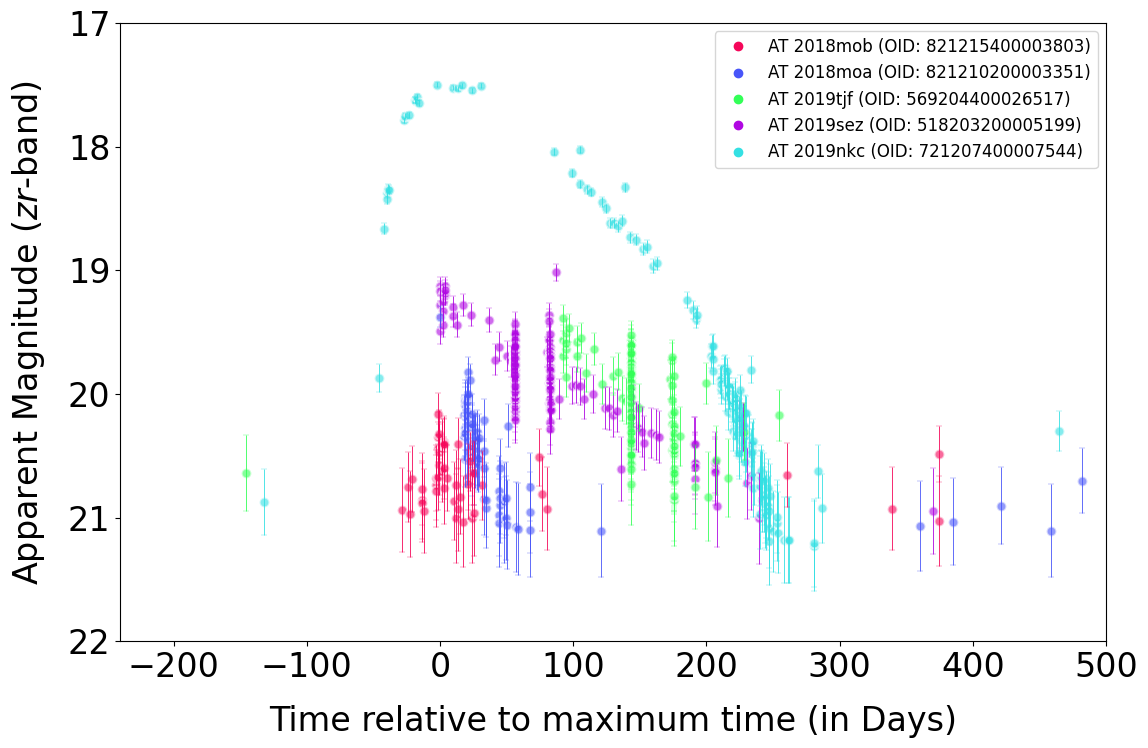

In [76]:
ph_legend_list1 = [f"AT 2019sez (OID: 518203200005199)",
                    f"AT 2019nkc (OID: 721207400007544)",
                    f"AT 2018moa (OID: 821210200003351)",
                    f"AT 2018mob (OID: 821215400003803)",
                    f"AT 2019tjf (OID: 569204400026517)"]
#
fig = plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 24})
color_list=list()
marker_list=list()
ax = plt.subplot()
ax.invert_yaxis()
ax.set_xlim([-240, 500])
ax.set_ylim([22, 17])

for name in oid_dict.keys():
  #
  if (data[data["iau_name"]==name]["z_sp"].values[0] == 0) and (name not in ["AT 2018lus", "AT 2023vgc"]):
    color_list.append(data[data['iau_name']==name]["color"].values[0])
    # 
    if name == "SN 2019meh":
      marker_list.append("D")
    else:
      marker_list.append("o")
    for oid in oid_dict[name]:
      oid_df = pd.read_csv(f"../ztf_oids/{oid}.csv", index_col=None)
      # 
      r_ref = data[data["iau_name"]==name]["ref"].values[0]
      err_r_ref = data[data["iau_name"]==name]["ref_err"].values[0]
      #
      oid_df['flux'] = 10**(-0.4*oid_df['mag']) - 10**(-0.4*r_ref)
      oid_df['fluxerr'] = np.sqrt(flux_error(oid_df['mag'],oid_df['magerr'])**2 + flux_error(r_ref,err_r_ref)**2)
      oid_df["snr"] = oid_df["flux"] / oid_df["fluxerr"]
      oidfil_df = oid_df[oid_df["snr"] > 3]
      #
      mag = - (2.5 * np.log10(oidfil_df["flux"]))
      mag_err = mag_error(oidfil_df["flux"], oidfil_df["fluxerr"])
      #
      oidfil_df["mag"] = mag
      oidfil_df["magerr"] = mag_err
      # 
      oidfil_df = oidfil_df.dropna()
      # 
      # abs_m = abs_mag_ext_corr(oid_df["mag"], data[data["oid"]==oid]["dist"].values[0], data[data["oid"]==oid]["mbv"].values[0])
      # abs_m = abs_mag(oid_df["mag"], data[data["oid"]==oid]["dist"].values[0])
      # oid_df["abs_mag"] = abs_m
      # min_mag_idx = oidfil_df['mag'].idxmin()
      # min_mjd = oidfil_df['mjd'][min_mag_idx]
      oidfil_df['delta_mjd'] = oidfil_df['mjd'] - data[data["iau_name"]==name]["max_time"].values[0]
      # 
      x=oidfil_df["delta_mjd"].to_numpy()
      y=oidfil_df["mag"].to_numpy()
      if name == "SN 2019meh":
        ax.scatter(x, y, c="white",s=20, alpha=0.8, edgecolors=data[data['iau_name']==name]["color"].values[0], linewidths=2.0, marker="D")
      else:
        ax.scatter(x, y, c=data[data['iau_name']==name]["color"].values[0],s=50, alpha=0.6, edgecolors="white", linewidths=1.5)
      #
      ax.errorbar(x, y, c=data[data['iau_name']==name]["color"].values[0], yerr=oidfil_df["magerr"], fmt='none', elinewidth=0.6, capsize=2, capthick=0.25)
# 
clset = set(zip(color_list, ph_legend_list1, marker_list))
# 
ax.grid(False)
ax.set_xlabel("Time relative to maximum time (in Days)", labelpad=15)
ax.set_ylabel("Apparent Magnitude ($\mathit{zr}$-band)", labelpad=15)
labels = [l for c,l,m in clset]
handles = [plt.plot([],color=c,ls="", marker=m)[0] for c,l,m in clset ]
ax.legend(handles,labels, loc='best', fontsize="12")
# 
plt.tight_layout()
# plt.savefig("../figures/SN-PhotRed-Final-app_mag.png")


## New candidates for SLSNe (To Do)

In [ ]:
z_ph = [0.10, 0.079, 0.293, 0.198, 0.336]
z_sp = [0.0, 0.0, 0.0, 0.0, 0.0]
z_err = [0.073, 0.039, 0.122, 0.056, 0.073]
iau_name = ["new1", "AT2019bu", "AT2018lxs", "AT2018map", "new2"]
ref_mag = [20.662, 19.444, 21.195, 21.008, 21.002]
ref_err = [0.049, 0.029, 0.092, 0.077, 0.051]
mbv = [0.02, 0.01, 0.02, 0.03, 0.01]
oid_dict = {"new1": [752206300003798],
            "AT2019bu":[752215400004930],
            "AT2018lxs": [795205100007271],
            "AT2018map": [724209100012449],
            "new2": [795208400003073]}
data = pd.DataFrame()

data["z_ph"] = z_ph
data["z_sp"] = z_sp
data["z_err"] = z_err
data["iau_name"] = iau_name
data["ref"] = ref_mag
data["ref_err"] = ref_err
data["mbv"] = mbv

l_dist = list()
abs_mag_list = list()
for i in range(len(data)):
  row = data.iloc[i, :]
  if row["z_sp"] == 0.0:
    l_dist.append(dist(row["z_ph"]))

  else:
    l_dist.append(dist(row["z_sp"]))


data["dist"] = l_dist


# Find the brightness - Apparent/Absolute
#
#
name = "new2"
#
if data[data["iau_name"]==name]["z_sp"].values[0] == 0:

  for e, oid in enumerate(oid_dict[name]):
    print(oid)

    oid_df = pd.read_csv(f"/content/gdrive/My Drive/new_SLSN/{oid}.csv", index_col=None)

    r_ref = data[data["iau_name"]==name]["ref"].values[0]
    err_r_ref = data[data["iau_name"]==name]["ref_err"].values[0]

    oid_df['flux'] = 10**(-0.4*oid_df['mag']) - 10**(-0.4*r_ref)
    oid_df['fluxerr'] = np.sqrt(flux_error(oid_df['mag'],oid_df['magerr'])**2 + flux_error(r_ref,err_r_ref)**2)
    oid_df["snr"] = oid_df["flux"] / oid_df["fluxerr"]
    oidfil_df = oid_df[oid_df["snr"] > 3]
    oidfil_df = oid_df.copy()

    mag = - (2.5 * np.log10(oidfil_df["flux"]))
    mag_err = mag_error(oidfil_df["flux"], oidfil_df["fluxerr"])

    if data[data["iau_name"]==name]["z_sp"].values[0] == 0:
      z_err = redshift_error(data[data["iau_name"]==name]["z_ph"].values[0], data[data["iau_name"]==name]["z_err"].values[0])
    else:
      z_err = redshift_error(data[data["iau_name"]==name]["z_sp"].values[0], data[data["iau_name"]==name]["z_err"].values[0])

    oidfil_df["mag"] = mag
    oidfil_df["magerr"] = mag_err

    oidfil_df = oidfil_df.dropna()
    abs_m = abs_mag_ext_corr(oidfil_df["mag"], data[data["iau_name"]==name]["dist"].values[0], data[data["iau_name"]==name]["mbv"].values[0])
    # abs_m = abs_mag_ext_corr(oidfil_df["mag"], data[data["oid"]==oid]["dist"].values[0], data[data["oid"]==oid]["mbv"].values[0])
    # abs_m = abs_mag(oid_df["mag"], data[data["oid"]==oid]["dist"].values[0])
    oidfil_df["abs_mag"] = abs_m
    min_mag_idx = oidfil_df['abs_mag'].idxmin()

    print(oidfil_df["abs_mag"].loc[min_mag_idx], oidfil_df["magerr"].loc[min_mag_idx], z_err)
